In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg

%matplotlib inline 
%reload_ext autoreload 
%autoreload 2

In [2]:
# import data 
#db = psycopg.connect(dbname='web_dns_analysis')
db = psycopg.connect(dbname='web_performance_final')
cursor = db.cursor()

websites_df = pd.read_sql_query("SELECT * FROM websites", db)
measurements_df = pd.read_sql_query("SELECT * FROM measurements", db)
#res = cursor.execute("SELECT dns, number_queried_servers  FROM websites ORDER BY number_queried_servers DESC LIMIT 50")
#print(cursor.fetchall())

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_91005/3330614689.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  websites_df = pd.read_sql_query("SELECT * FROM websites", db)
/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_91005/3330614689.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  measurements_df = pd.read_sql_query("SELECT * FROM measurements", db)


In [10]:
websites_df

,_id,has_website,has_error,dns,number_dns_queries,number_objects_loaded,number_queried_servers,number_non_origin_servers,number_mime_types,bytes_downladed,har_file
0,940334,True,True,crohn-colitis-info.at,None,102.0,6.0,5.0,14.0,3646848.0,True
1,458600,True,True,robertaspizza.com,None,60.0,12.0,11.0,15.0,3256246.0,True
2,955456,True,True,techdifferences.com,None,40.0,12.0,10.0,15.0,950706.0,True
3,437664,True,True,ufabet.navy,None,24.0,3.0,1.0,5.0,604585.0,True
4,653103,True,True,eclecticrecipes.com,None,31.0,13.0,11.0,17.0,1352135.0,True
...,...,...,...,...,...,...,...,...,...,...,...
999995,585227,True,False,conflictarm.com,None,0.0,0.0,0.0,0.0,0.0,False
999996,766938,True,False,batepapocommulheres.com,None,0.0,0.0,0.0,0.0,0.0,False
999997,658198,True,False,nezavisim.tv,None,0.0,0.0,0.0,0.0,0.0,False
999998,564741,True,False,aare.edu.au,None,0.0,0.0,0.0,0.0,0.0,False


In [30]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    #display(measurements_df.head(5))
    display(cleaned_measurements_df.head(20))
# time in ms

,id,protocol,server,domain,timestamp,connectend,connectstart,domcomplete,domcontentloadedeventend,domcontentloadedeventstart,dominteractive,domainlookupend,domainlookupstart,duration,encodedbodysize,decodedbodysize,transfersize,fetchstart,loadeventend,loadeventstart,requeststart,responseend,responsestart,secureconnectionstart,starttime,firstpaint,firstcontentfulpaint,nexthopprotocol,cachewarming,error,redirectstart,redirectend,redirectcount,dns_duration,web_duration
1,1100453,quic,quic://resolver64.dns4all.eu,sedanoallegro.it,1729885213,905,507,2731,1763,1756,1706,507,507,2741,11664,89133,12158,436,2741,2731,906,982,982,546,0,0,1575,h2,1,,0,0,0,0,2234
2,1100468,quic,quic://resolver64.dns4all.eu,sedanoallegro.it,1729885219,336,240,1619,1085,1078,1064,240,240,1631,11664,89133,12158,211,1631,1619,336,396,396,272,0,0,970,h2,0,,0,0,0,0,1391
5,1100559,quic,quic://resolver64.dns4all.eu,seduca.gov.co,1729885250,662,621,2738,1799,1730,1639,621,621,2740,17530,94818,19001,488,2740,2738,662,1122,1122,643,0,0,1640,h2,1,,0,0,0,0,2119
6,1100590,quic,quic://resolver64.dns4all.eu,seduca.gov.co,1729885256,511,463,7085,1612,1524,1469,463,463,7098,17529,94817,19002,436,7098,7085,511,1044,1044,483,0,0,1470,h2,0,,0,0,0,0,6635
7,1100602,quic,quic://resolver64.dns4all.eu,seduccioncharrua.com,1729885266,277,277,825,735,730,699,277,277,827,34863,163345,35926,277,827,825,360,430,430,277,0,0,684,h2,1,,0,0,0,0,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,1100741,quic,quic://resolver64.dns4all.eu,seed2plant.in,1729885314,91,34,1369,899,874,755,34,34,1373,97822,852724,101440,0,1373,1369,91,117,117,51,0,0,523,h2,0,,0,0,0,0,1339
19,1100752,quic,quic://resolver64.dns4all.eu,seedsgrowerp.com,1729885318,1257,307,1568,1568,1564,1561,307,307,1568,3,3,166,0,1568,1568,1257,1551,1551,601,0,0,1565,http/1.1,1,,0,0,0,0,1261
20,1100761,quic,quic://resolver64.dns4all.eu,seedsgrowerp.com,1729885323,969,39,1339,1339,1332,1328,39,39,1339,3,3,166,0,1339,1339,969,1287,1287,348,0,0,1335,http/1.1,0,,0,0,0,0,1300
21,1100789,quic,quic://resolver64.dns4all.eu,seedstock.jp,1729885327,117,58,8606,4548,4543,4458,58,58,8609,27389,213301,28406,0,8609,8606,117,2851,2851,58,0,0,4459,h3,1,,0,0,0,0,8551


In [15]:
measurements_df.columns.values

array(['id', 'protocol', 'server', 'domain', 'timestamp', 'connectend',
       'connectstart', 'domcomplete', 'domcontentloadedeventend',
       'domcontentloadedeventstart', 'dominteractive', 'domainlookupend',
       'domainlookupstart', 'duration', 'encodedbodysize',
       'decodedbodysize', 'transfersize', 'fetchstart', 'loadeventend',
       'loadeventstart', 'requeststart', 'responseend', 'responsestart',
       'secureconnectionstart', 'starttime', 'firstpaint',
       'firstcontentfulpaint', 'nexthopprotocol', 'cachewarming', 'error',
       'redirectstart', 'redirectend', 'redirectcount'], dtype=object)

In [3]:
# calculate general metrics

cursor.execute("SELECT COUNT(*) FROM websites WHERE har_file=TRUE")
websites_count = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM measurements WHERE protocol='udp'")
page_loads_udp = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM measurements WHERE protocol='h3'")
page_loads_h3 = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM measurements WHERE protocol='quic'")
page_loads_quic = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM measurements WHERE protocol='udp' AND error != ''")
website_errors_udp = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM measurements WHERE protocol='h3' AND error != ''")
website_errors_h3 = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM measurements WHERE protocol='quic' AND error != ''")
website_errors_quic = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM measurements WHERE error != ''")
website_errors = cursor.fetchone()[0]


print("total number of websites: ", websites_count)
print('page loads UDP: ', page_loads_udp)
print('page loads QUIC: ', page_loads_quic)
print('page loads H3: ', page_loads_h3)
print("website errors for all protocols: ", website_errors)
print('website errors UDP: ', website_errors_udp)
print('website errors QUIC: ', website_errors_quic)
print('website errors H3: ', website_errors_h3)

cursor.execute("SELECT COUNT(*) FROM measurements WHERE protocol='udp' AND error = '' AND cachewarming=1")
website_cold_udp = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM measurements WHERE protocol='h3' AND error = '' AND cachewarming=1")
website_cold_h3 = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM measurements WHERE protocol='quic' AND error = '' AND cachewarming=1")
website_cold_quic = cursor.fetchone()[0]

print('warm up requests UDP: ', website_cold_udp)
print('warm up requests QUIC: ', website_cold_quic)
print('warm up requests H3: ', website_cold_h3)

cursor.execute("SELECT COUNT(*) FROM measurements WHERE protocol='udp' AND error = '' AND cachewarming=0")
website_warm_udp = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM measurements WHERE protocol='h3' AND error = '' AND cachewarming=0")
website_warm_h3 = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM measurements WHERE protocol='quic' AND error = '' AND cachewarming=0")
website_warm_quic = cursor.fetchone()[0]

print('measurement requests UDP: ', website_warm_udp)
print('measurement requests QUIC: ', website_warm_quic)
print('measurement requests H3: ', website_warm_h3)


total number of websites:  572345
page loads UDP:  593155
page loads QUIC:  561908
page loads H3:  714042
website errors for all protocols:  468723
website errors UDP:  156350
website errors QUIC:  145824
website errors H3:  166549
warm up requests UDP:  220994
warm up requests QUIC:  210587
warm up requests H3:  276107
measurement requests UDP:  215811
measurement requests QUIC:  205497
measurement requests H3:  271386


In [6]:
# calculate mean and median DNS request times
cleaned_measurements_df = measurements_df[measurements_df['error'] == '']
#cleaned_measurements_paint_df = cleaned_measurements_df.copy()

cleaned_measurements_df = cleaned_measurements_df[cleaned_measurements_df['loadeventend'] != 0]
cleaned_measurements_df = cleaned_measurements_df[cleaned_measurements_df['firstcontentfulpaint'] != 0]

cleaned_measurements_df['dns_duration'] = cleaned_measurements_df['domainlookupend'] - cleaned_measurements_df['domainlookupstart']
#cleaned_measurements_df['dns_duration2'] = cleaned_measurements_df['domainlookupend'] - cleaned_measurements_df['domainlookupstart']

udp_measurements_df = cleaned_measurements_df[cleaned_measurements_df['protocol'] == 'udp']
h3_measurements_df = cleaned_measurements_df[cleaned_measurements_df['protocol'] == 'h3']
quic_measurements_df = cleaned_measurements_df[cleaned_measurements_df['protocol'] == 'quic']

dns_mean_udp = udp_measurements_df['dns_duration'].mean()
dns_mean_quic = quic_measurements_df['dns_duration'].mean()
dns_mean_h3 = h3_measurements_df['dns_duration'].mean()

dns_median_udp = udp_measurements_df['dns_duration'].median()
dns_median_quic = quic_measurements_df['dns_duration'].median()
dns_median_h3 = h3_measurements_df['dns_duration'].median()


print('---------DNS statistics UDP---------')
print('median: ', dns_median_udp)
print('mean: ', dns_mean_udp)
print('---------DNS statistics QUIC---------')
print('median: ', dns_median_quic)
print('mean: ', dns_mean_quic)
print('---------DNS statistics H3---------')
print('median: ', dns_median_h3)
print('mean: ', dns_mean_h3)
print('---------DNS Performance Penalty---------')
print('performance penalty QUIC (mean): ', dns_mean_quic - dns_mean_udp)
print('performance penalty QUIC (median): ', dns_median_quic - dns_median_udp)
print('performance penalty H3 (mean): ', dns_mean_h3 - dns_mean_udp)
print('performance penalty H3 (median): ', dns_median_h3 - dns_median_udp)

#TODO use fetchStart instead. Cache is deactived in the script, and dnsLookUpEnd is clearly not correct

#TODO calculate numbers for intersect group?

---------DNS statistics UDP---------
median:  0.0
mean:  4.355922817973362
---------DNS statistics QUIC---------
median:  0.0
mean:  4.874860868182541
---------DNS statistics H3---------
median:  0.0
mean:  4.891209530887062
---------DNS Performance Penalty---------
performance penalty QUIC (mean):  0.5189380502091794
performance penalty QUIC (median):  0.0
performance penalty H3 (mean):  0.5352867129137007
performance penalty H3 (median):  0.0


In [100]:
cleaned_measurements_df

,id,protocol,server,domain,timestamp,connectend,connectstart,domcomplete,domcontentloadedeventend,domcontentloadedeventstart,...,starttime,firstpaint,firstcontentfulpaint,nexthopprotocol,cachewarming,error,redirectstart,redirectend,redirectcount,dns_duration
0,14373,udp,resolver64.dns4all.eu,misiontokyo.com,1729549860,178,82,233,232,228,...,0,0,253,http/1.1,1,,0,0,0,4
1,14374,quic,quic://resolver64.dns4all.eu,misiontokyo.com,1729549861,149,62,235,235,226,...,0,0,228,http/1.1,1,,0,0,0,0
2,14375,h3,h3://resolver64.dns4all.eu,misiontokyo.com,1729549861,160,68,255,251,230,...,0,0,256,http/1.1,1,,0,0,0,0
3,14376,quic,quic://resolver64.dns4all.eu,xnet.co.il,1729549861,182,69,403,370,361,...,0,0,395,h2,1,,0,0,0,3
4,14377,quic,quic://resolver64.dns4all.eu,myagrar.de,1729549861,253,212,1122,1116,1036,...,0,0,820,h2,1,,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869099,1883472,h3,h3://resolver64.dns4all.eu,lebanondemocrat.com,1730379461,401,401,868,701,696,...,0,0,555,h2,0,,0,0,0,0
1869101,1883474,h3,h3://resolver64.dns4all.eu,pozdravuha.ru,1730379477,241,241,933,510,505,...,0,0,539,h3,1,,0,0,0,0
1869102,1883475,h3,h3://resolver64.dns4all.eu,pozdravuha.ru,1730379481,151,151,784,415,411,...,0,0,420,h3,0,,0,0,0,0
1869103,1883476,h3,h3://resolver64.dns4all.eu,stratolaunch.com,1730379484,480,480,2971,1224,1219,...,0,0,1076,h2,1,,0,0,0,0


In [4]:
cleaned_measurements_df['dns_duration2'] = cleaned_measurements_df['domainlookupend'] - cleaned_measurements_df['fetchstart']
temp_df = cleaned_measurements_df[cleaned_measurements_df['dns_duration2'] > 0]
#cleaned_measurements_df[cleaned_measurements_df['dns_duration2'] > 0]

udp_temp_df = temp_df[temp_df['protocol'] == 'udp']
h3_temp_df = temp_df[temp_df['protocol'] == 'h3']
quic_temp_df = temp_df[temp_df['protocol'] == 'quic']

NameError: name 'cleaned_measurements_df' is not defined

In [102]:
print(quic_temp_df['dns_duration'].median())
print(quic_temp_df[quic_temp_df['cachewarming'] == 1]['dns_duration'].median())

print(quic_temp_df['dns_duration'].mean())
print(quic_temp_df[quic_temp_df['cachewarming'] == 1]['dns_duration'].mean())

print(h3_temp_df['dns_duration'].median())
print(h3_temp_df[h3_temp_df['cachewarming'] == 1]['dns_duration'].median())

print(h3_temp_df['dns_duration'].mean())
print(h3_temp_df[h3_temp_df['cachewarming'] == 1]['dns_duration'].mean())

print(udp_temp_df['dns_duration'].median())
print(udp_temp_df[udp_temp_df['cachewarming'] == 1]['dns_duration'].median())

print(udp_temp_df['dns_duration'].mean())
print(udp_temp_df[udp_temp_df['cachewarming'] == 1]['dns_duration'].mean())


0.0
0.0
6.174302271191726
10.517423970460024
0.0
0.0
6.28122314379934
11.027377144015546
0.0
0.0
5.604061662450806
9.015315728193821


In [7]:
# calculate mean and median web loading times

cleaned_measurements_df['web_duration'] = cleaned_measurements_df['loadeventend'] - cleaned_measurements_df['fetchstart']

warmed_up_measurements_df = cleaned_measurements_df[cleaned_measurements_df['cachewarming'] == 0]

udp_measurements_df = warmed_up_measurements_df[warmed_up_measurements_df['protocol'] == 'udp']
h3_measurements_df = warmed_up_measurements_df[warmed_up_measurements_df['protocol'] == 'h3']
quic_measurements_df = warmed_up_measurements_df[warmed_up_measurements_df['protocol'] == 'quic']

web_mean_udp = udp_measurements_df['web_duration'].mean()
web_mean_quic = quic_measurements_df['web_duration'].mean()
web_mean_h3 = h3_measurements_df['web_duration'].mean()

web_median_udp = udp_measurements_df['web_duration'].median()
web_median_quic = quic_measurements_df['web_duration'].median()
web_median_h3 = h3_measurements_df['web_duration'].median()


print('---------Web statistics UDP---------')
print('median: ', web_median_udp)
print('mean: ', web_mean_udp)
print('---------Web statistics QUIC---------')
print('median: ', web_median_quic)
print('mean: ', web_mean_quic)
print('---------Web statistics H3---------')
print('median: ', web_median_h3)
print('mean: ', web_mean_h3)
print('---------Web Performance Penalty---------')
print('performance penalty QUIC (mean): ', web_mean_quic - web_mean_udp)
print('performance penalty QUIC (median): ', web_median_quic - web_median_udp)
print('performance penalty H3 (mean): ', web_mean_h3 - web_mean_udp)
print('performance penalty H3 (median): ', web_median_h3 - web_median_udp)

---------Web statistics UDP---------
median:  1362.0
mean:  1779.6504914793777
---------Web statistics QUIC---------
median:  1360.0
mean:  1799.5997278120033
---------Web statistics H3---------
median:  1368.0
mean:  1800.7929135527224
---------Web Performance Penalty---------
performance penalty QUIC (mean):  19.94923633262556
performance penalty QUIC (median):  -2.0
performance penalty H3 (mean):  21.142422073344733
performance penalty H3 (median):  6.0


In [80]:
#print(cleaned_measurements_df[cleaned_measurements_df['loadeventend'] == 0].shape[0])
#print(cleaned_measurements_df.shape[0])
#cleaned_measurements_df[cleaned_measurements_df['loadeventend'] == 0]['firstcontentfulpaint']
#cleaned_measurements_df[cleaned_measurements_df['web_duration'] < 0]['web_duration']
cleaned_measurements_df

,id,protocol,server,domain,timestamp,connectend,connectstart,domcomplete,domcontentloadedeventend,domcontentloadedeventstart,...,firstcontentfulpaint,nexthopprotocol,cachewarming,error,redirectstart,redirectend,redirectcount,dns_duration,dns_duration2,web_duration
4854,19507,h3,h3://resolver64.dns4all.eu,avast.com,1729551137,400,400,0,0,0,...,1135,h2,0,,0,0,0,0,0,-400
4975,19473,h3,h3://resolver64.dns4all.eu,avast.com,1729551128,398,398,0,0,0,...,1531,h2,1,,0,0,0,0,0,-398
5226,19821,udp,resolver64.dns4all.eu,avast.com,1729551221,259,259,0,0,0,...,953,h2,1,,0,0,0,0,0,-259
5227,19852,udp,resolver64.dns4all.eu,avast.com,1729551229,299,299,0,0,0,...,778,h2,0,,0,0,0,0,0,-299
5375,19525,quic,quic://resolver64.dns4all.eu,avast.com,1729551144,279,279,0,0,0,...,1042,h2,1,,0,0,0,0,0,-279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866861,1881340,h3,h3://resolver64.dns4all.eu,fimi.it,1730378180,232,159,0,0,0,...,722,h2,0,,0,0,0,0,23,-135
1867644,1882106,h3,h3://resolver64.dns4all.eu,workdocs.aws,1730378552,664,55,0,0,0,...,1390,h2,1,,0,0,0,4,55,0
1867677,1882116,h3,h3://resolver64.dns4all.eu,workdocs.aws,1730378557,923,24,0,0,0,...,1307,h2,0,,0,0,0,0,24,0
1868481,1882893,h3,h3://resolver64.dns4all.eu,myges.fr,1730378954,147,37,0,556,540,...,517,h2,1,,0,0,0,0,37,0


In [98]:
cleaned_measurements_df[cleaned_measurements_df['firstcontentfulpaint'] == 0]

,id,protocol,server,domain,timestamp,connectend,connectstart,domcomplete,domcontentloadedeventend,domcontentloadedeventstart,...,firstcontentfulpaint,nexthopprotocol,cachewarming,error,redirectstart,redirectend,redirectcount,dns_duration,dns_duration2,web_duration
376,14775,h3,h3://resolver64.dns4all.eu,toyota-fs.kz,1729549930,349,183,458,458,454,...,0,h2,1,,0,0,0,0,183,458
377,14817,h3,h3://resolver64.dns4all.eu,toyota-fs.kz,1729549937,188,30,3749,3749,3737,...,0,h2,0,,0,0,0,0,30,3750
390,14858,quic,quic://resolver64.dns4all.eu,toyota-fs.kz,1729549954,195,32,308,307,303,...,0,h2,0,,0,0,0,0,32,308
404,14894,quic,quic://resolver64.dns4all.eu,revolvy.com,1729549962,338,27,509,509,481,...,0,h2,0,,0,0,0,0,27,510
429,14863,quic,quic://resolver64.dns4all.eu,revolvy.com,1729549952,3394,51,3528,3528,3523,...,0,h2,1,,0,0,0,0,51,3528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869043,1883392,h3,h3://resolver64.dns4all.eu,secureboxes.net,1730379258,317,21,473,473,469,...,0,http/1.1,0,,0,0,0,0,21,474
1869061,1883425,h3,h3://resolver64.dns4all.eu,beeblockerpros.com,1730379306,368,49,490,490,487,...,0,h2,1,,0,0,0,0,49,491
1869062,1883427,h3,h3://resolver64.dns4all.eu,beeblockerpros.com,1730379309,324,23,446,446,443,...,0,h2,0,,0,0,0,0,23,447
1869096,1883469,h3,h3://resolver64.dns4all.eu,stundenplan24.de,1730379452,187,85,366,363,337,...,0,h2,1,,0,0,0,0,85,366


In [8]:
# filter for websites, which completed all three measurements
#domains_counted = warmed_up_measurements_df.groupby(['domain'])['domain'].count()
#domains_counted = warmed_up_measurements_df.groupby(['domain']).agg({'domain': 'count'})#.rename(columns={'count': 'number_of_rows'})

domains_counted = warmed_up_measurements_df.groupby('domain', as_index=False)['domain'].agg({'count':'count'})
intersect_domains = domains_counted[domains_counted['count'] == 3]
print(domains_counted)

#print(domains_counted[domains_counted['count'] == 3])

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_91005/2834269393.py:5: FutureWarning: Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.
  domains_counted = warmed_up_measurements_df.groupby('domain', as_index=False)['domain'].agg({'count':'count'})


                  domain  count
0                 0-1.ir      1
1                0-6.com      1
2         0-admiralx.icu      1
3              00-tv.com      1
4       00055edc1917.com      1
...                  ...    ...
429104  zzzquilnatura.it      1
429105           zzzs.si      1
429106      zzzscore.com      1
429107       zzzsoku.com      2
429108       zzztube.com      1

[429109 rows x 2 columns]


In [87]:
intersect_domains

,domain,count
7,001.bj,3
19,004gmbh.de,3
27,007cctv.com,3
30,007onlinecasino.club,3
31,007onlinecasino.net,3
...,...,...
454934,zzhczs.com,3
454943,zzkaizhi.com,3
454984,zztuoying.com,3
454987,zzwangu.com,3


In [9]:
# calculate mean and median web loading times for intersect domains 
intersect_measurements = cleaned_measurements_df[cleaned_measurements_df['domain'].isin(intersect_domains['domain'])]
#intersect_measurements_paint = cleaned_measurements_paint_df[cleaned_measurements_paint_df['domain'].isin(intersect_domains['domain'])]

#cleaned_measurements_df['web_duration'] = cleaned_measurements_df['loadeventend'] - cleaned_measurements_df['fetchstart']

warmed_up_intersect_measurements_df = intersect_measurements[intersect_measurements['cachewarming'] == 0]
#warmed_up_intersect_measurements_paint_df = intersect_measurements[intersect_measurements_paint['cachewarming'] == 0]

udp_measurements_intersect_df = warmed_up_intersect_measurements_df[warmed_up_intersect_measurements_df['protocol'] == 'udp']
h3_measurements_intersect_df = warmed_up_intersect_measurements_df[warmed_up_intersect_measurements_df['protocol'] == 'h3']
quic_measurements_intersect_df = warmed_up_intersect_measurements_df[warmed_up_intersect_measurements_df['protocol'] == 'quic']

#udp_measurements_intersect_paint_df = warmed_up_intersect_measurements_paint_df[warmed_up_intersect_measurements_paint_df['protocol'] == 'udp']
#h3_measurements_intersect_paint_df = warmed_up_intersect_measurements_paint_df[warmed_up_intersect_measurements_paint_df['protocol'] == 'h3']
#quic_measurements_intersect_paint_df = warmed_up_intersect_measurements_paint_df[warmed_up_intersect_measurements_paint_df['protocol'] == 'quic']

web_mean_intersect_udp = udp_measurements_intersect_df['web_duration'].mean()
web_mean_intersect_quic = quic_measurements_intersect_df['web_duration'].mean()
web_mean_intersect_h3 = h3_measurements_intersect_df['web_duration'].mean()

web_median_intersect_udp = udp_measurements_intersect_df['web_duration'].median()
web_median_intersect_quic = quic_measurements_intersect_df['web_duration'].median()
web_median_intersect_h3 = h3_measurements_intersect_df['web_duration'].median()


print('---------Web statistics UDP---------')
print('median: ', web_median_intersect_udp)
print('mean: ', web_mean_intersect_udp)
print('---------Web statistics QUIC---------')
print('median: ', web_median_intersect_quic)
print('mean: ', web_mean_intersect_quic)
print('---------Web statistics H3---------')
print('median: ', web_median_intersect_h3)
print('mean: ', web_mean_intersect_h3)
print('---------Web Performance Penalty---------')
print('performance penalty QUIC (mean): ', web_mean_intersect_quic - web_mean_intersect_udp)
print('performance penalty QUIC (median): ', web_median_intersect_quic - web_median_intersect_udp)
print('performance penalty H3 (mean): ', web_mean_intersect_h3 - web_mean_intersect_udp)
print('performance penalty H3 (median): ', web_median_intersect_h3 - web_median_intersect_udp)

---------Web statistics UDP---------
median:  1330.0
mean:  1713.898211443019
---------Web statistics QUIC---------
median:  1329.0
mean:  1729.7711038177517
---------Web statistics H3---------
median:  1330.0
mean:  1712.9607662179806
---------Web Performance Penalty---------
performance penalty QUIC (mean):  15.872892374732828
performance penalty QUIC (median):  -1.0
performance penalty H3 (mean):  -0.9374452250383456
performance penalty H3 (median):  0.0


In [14]:
web_mean_intersect_FCP_udp = udp_measurements_intersect_df['firstcontentfulpaint'].mean()
web_mean_intersect_FCP_quic = quic_measurements_intersect_df['firstcontentfulpaint'].mean()
web_mean_intersect_FCP_h3 = h3_measurements_intersect_df['firstcontentfulpaint'].mean()

web_median_intersect_FCP_udp = udp_measurements_intersect_df['firstcontentfulpaint'].median()
web_median_intersect_FCP_quic = quic_measurements_intersect_df['firstcontentfulpaint'].median()
web_median_intersect_FCP_h3 = h3_measurements_intersect_df['firstcontentfulpaint'].median()


print('---------Web statistics UDP---------')
print('median: ', web_median_intersect_FCP_udp)
print('mean: ', web_mean_intersect_FCP_udp)
print('---------Web statistics QUIC---------')
print('median: ', web_median_intersect_FCP_quic)
print('mean: ', web_mean_intersect_FCP_quic)
print('---------Web statistics H3---------')
print('median: ', web_median_intersect_FCP_h3)
print('mean: ', web_mean_intersect_FCP_h3)
print('---------Web Performance Penalty---------')
print('performance penalty QUIC (mean): ', web_mean_intersect_FCP_quic - web_mean_intersect_FCP_udp)
print('performance penalty QUIC (median): ', web_median_intersect_FCP_quic - web_median_intersect_FCP_udp)
print('performance penalty H3 (mean): ', web_mean_intersect_FCP_h3 - web_mean_intersect_FCP_udp)
print('performance penalty H3 (median): ', web_median_intersect_FCP_h3 - web_median_intersect_FCP_udp)

---------Web statistics UDP---------
median:  873.0
mean:  1123.689601086244
---------Web statistics QUIC---------
median:  870.0
mean:  1129.0450793957236
---------Web statistics H3---------
median:  871.0
mean:  1122.5079007788231
---------Web Performance Penalty---------
performance penalty QUIC (mean):  5.355478309479622
performance penalty QUIC (median):  -3.0
performance penalty H3 (mean):  -1.181700307420897
performance penalty H3 (median):  -2.0


In [55]:
warmed_up_intersect_measurements_df

,id,protocol,server,domain,timestamp,connectend,connectstart,domcomplete,domcontentloadedeventend,domcontentloadedeventstart,...,firstcontentfulpaint,nexthopprotocol,cachewarming,error,redirectstart,redirectend,redirectcount,dns_duration,dns_duration2,web_duration
40,14878,quic,quic://resolver64.dns4all.eu,ziosting.io,1729549958,302,229,1235,944,937,...,811,h2,0,,0,0,0,19,20,1041
152,14870,quic,quic://resolver64.dns4all.eu,windows.com,1729549953,1554,1554,3864,3225,3211,...,3220,h2,0,,0,0,0,0,0,2317
223,14828,quic,quic://resolver64.dns4all.eu,nmbe.ch,1729549944,312,312,780,780,742,...,581,h2,0,,0,0,0,0,0,468
231,14819,quic,quic://resolver64.dns4all.eu,citizenscience.gov,1729549940,858,779,2622,1531,1520,...,1072,h2,0,,0,0,0,1,23,1866
238,14822,udp,resolver64.dns4all.eu,citizenscience.gov,1729549940,1109,1046,2723,1679,1674,...,1370,h2,0,,0,0,0,0,27,1705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868968,1883438,h3,h3://resolver64.dns4all.eu,bigbox.com.ar,1730379344,112,112,3151,567,563,...,813,h2,0,,0,0,0,0,0,3121
1869089,1883447,h3,h3://resolver64.dns4all.eu,airtelwork.com,1730379371,228,35,1791,1791,1786,...,1788,h2,0,,0,0,0,0,35,1792
1869091,1883449,h3,h3://resolver64.dns4all.eu,montazer.ir,1730379379,56,19,1490,744,732,...,669,h3,0,,0,0,0,0,19,1490
1869093,1883452,h3,h3://resolver64.dns4all.eu,joscha.com,1730379387,69,21,359,320,314,...,301,h2,0,,0,0,0,0,21,363


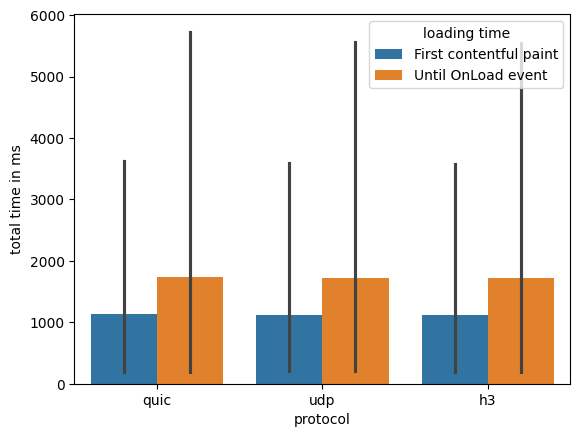

In [15]:
# bar plot for loading times 
bar_plot_loading_df = warmed_up_intersect_measurements_df[["protocol", "firstcontentfulpaint", "web_duration"]]
bar_plot_loading_df = bar_plot_loading_df.rename(columns={'firstcontentfulpaint': 'First contentful paint', 'web_duration': 'Until OnLoad event'})

sub_fig_2 = sns.barplot(data=bar_plot_loading_df.melt(id_vars='protocol',
                                  value_name='total time in ms', var_name='loading time'), 
            x="protocol", y="total time in ms", hue='loading time', errorbar="pi")

<Axes: xlabel='protocol', ylabel='total time in ms'>

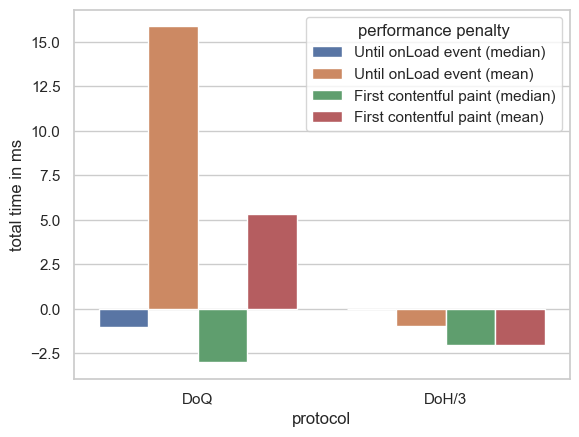

In [16]:
# create barplot for performance penalty

bar_plot_df =  pd.DataFrame(data={'protocol': 
                                  ['DoQ', 'DoH/3'], 
                                  'Until onLoad event (median)': 
                                  [web_median_intersect_quic - web_median_intersect_udp, web_median_intersect_h3 - web_median_intersect_udp],
                                  'Until onLoad event (mean)': 
                                  [web_mean_intersect_quic - web_mean_intersect_udp, web_mean_intersect_h3 - web_mean_intersect_udp],
                                  'First contentful paint (median)': 
                                  [web_median_intersect_FCP_quic - web_median_intersect_FCP_udp, web_median_intersect_FCP_h3 - web_median_intersect_FCP_udp],
                                  'First contentful paint (mean)': 
                                  [web_mean_intersect_FCP_quic - web_mean_intersect_FCP_udp, web_median_intersect_FCP_h3 - web_median_intersect_FCP_udp]
                                 })

sns.set_theme(style="whitegrid")
sns.barplot(data=bar_plot_df.melt(id_vars='protocol',
                                  value_name='total time in ms', var_name='performance penalty'),
            x='protocol', y='total time in ms', hue='performance penalty')






/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_91005/2370252410.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


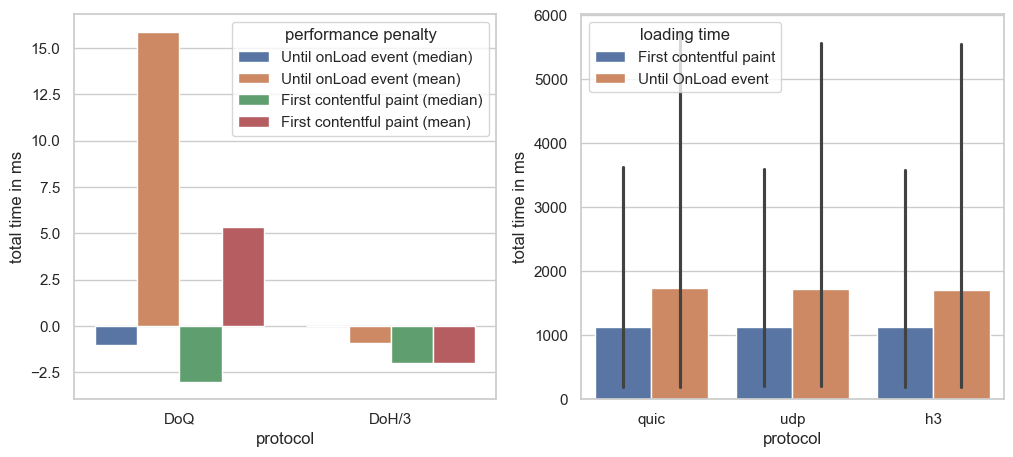

In [17]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(12, 5)

sub_fig_1 = sns.barplot(data=bar_plot_df.melt(id_vars='protocol',
                                  value_name='total time in ms', var_name='performance penalty'),
            x='protocol', y='total time in ms', hue='performance penalty', ax=ax[0])
sub_fig_2 = sns.barplot(data=bar_plot_loading_df.melt(id_vars='protocol',
                                  value_name='total time in ms', var_name='loading time'), 
            x="protocol", y="total time in ms", hue='loading time', errorbar="pi", ax=ax[1])
fig.show()
plt.savefig("impact_time_metrics.png",  bbox_inches='tight', dpi=400)

In [110]:
bar_plot_df

,protocol,Until onLoad event (median),Until onLoad event (mean),First contentful paint (median),First contentful paint (mean)
0,DoQ,-1.0,15.872892,-3.0,5.355478
1,DoH/3,0.0,-0.937445,-2.0,-2.000000


In [52]:
print(quic_temp_df['dns_duration2'].median())
print(quic_temp_df[quic_temp_df['cachewarming'] == 1]['dns_duration2'].median())
print(quic_temp_df[quic_temp_df['cachewarming'] == 0]['dns_duration2'].median())

print(quic_temp_df['dns_duration2'].mean())
print(quic_temp_df[quic_temp_df['cachewarming'] == 1]['dns_duration2'].mean())
print(quic_temp_df[quic_temp_df['cachewarming'] == 0]['dns_duration2'].mean())

print(h3_temp_df['dns_duration2'].median())
print(h3_temp_df[h3_temp_df['cachewarming'] == 1]['dns_duration2'].median())
print(h3_temp_df[h3_temp_df['cachewarming'] == 0]['dns_duration2'].median())

print(h3_temp_df['dns_duration2'].mean())
print(h3_temp_df[h3_temp_df['cachewarming'] == 1]['dns_duration2'].mean())
print(h3_temp_df[h3_temp_df['cachewarming'] == 0]['dns_duration2'].mean())

print(udp_temp_df['dns_duration2'].median())
print(udp_temp_df[udp_temp_df['cachewarming'] == 1]['dns_duration2'].median())
print(udp_temp_df[udp_temp_df['cachewarming'] == 0]['dns_duration2'].median())

print(udp_temp_df['dns_duration2'].mean())
print(udp_temp_df[udp_temp_df['cachewarming'] == 1]['dns_duration2'].mean())
print(udp_temp_df[udp_temp_df['cachewarming'] == 0]['dns_duration2'].mean())



39.0
69.0
28.0
87.87841714413504
133.37790374738444
41.13553611769028
38.0
64.0
27.0
81.0046744404644
123.23431333115462
37.872910622127506
38.0
56.0
30.0
69.52086595562383
103.06900598435757
35.0671258000524


In [61]:
# set the DNS performance in relation to the web loading times 
warmed_up_intersect_measurements_df

,id,protocol,server,domain,timestamp,connectend,connectstart,domcomplete,domcontentloadedeventend,domcontentloadedeventstart,...,firstcontentfulpaint,nexthopprotocol,cachewarming,error,redirectstart,redirectend,redirectcount,dns_duration,dns_duration2,web_duration
40,14878,quic,quic://resolver64.dns4all.eu,ziosting.io,1729549958,302,229,1235,944,937,...,811,h2,0,,0,0,0,19,20,1041
152,14870,quic,quic://resolver64.dns4all.eu,windows.com,1729549953,1554,1554,3864,3225,3211,...,3220,h2,0,,0,0,0,0,0,2317
223,14828,quic,quic://resolver64.dns4all.eu,nmbe.ch,1729549944,312,312,780,780,742,...,581,h2,0,,0,0,0,0,0,468
231,14819,quic,quic://resolver64.dns4all.eu,citizenscience.gov,1729549940,858,779,2622,1531,1520,...,1072,h2,0,,0,0,0,1,23,1866
238,14822,udp,resolver64.dns4all.eu,citizenscience.gov,1729549940,1109,1046,2723,1679,1674,...,1370,h2,0,,0,0,0,0,27,1705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868968,1883438,h3,h3://resolver64.dns4all.eu,bigbox.com.ar,1730379344,112,112,3151,567,563,...,813,h2,0,,0,0,0,0,0,3121
1869089,1883447,h3,h3://resolver64.dns4all.eu,airtelwork.com,1730379371,228,35,1791,1791,1786,...,1788,h2,0,,0,0,0,0,35,1792
1869091,1883449,h3,h3://resolver64.dns4all.eu,montazer.ir,1730379379,56,19,1490,744,732,...,669,h3,0,,0,0,0,0,19,1490
1869093,1883452,h3,h3://resolver64.dns4all.eu,joscha.com,1730379387,69,21,359,320,314,...,301,h2,0,,0,0,0,0,21,363


In [18]:
scatterplot_df = warmed_up_intersect_measurements_df[['domain','web_duration', 'protocol', 'firstcontentfulpaint']]


q_h_scatterplot_df = scatterplot_df[scatterplot_df['protocol'] != 'udp']
u_scatterplot_df = scatterplot_df[scatterplot_df['protocol'] == 'udp']
u_scatterplot_df = u_scatterplot_df.rename(columns={'web_duration': 'web_duration_udp', 'firstcontentfulpaint': 'firstcontentfulpaint_udp'})

q_h_scatterplot_df['performance_penalty_web_duration'] = q_h_scatterplot_df['web_duration'] 
q_h_scatterplot_df['performance_penalty_firstcontentfulpaint'] = q_h_scatterplot_df['firstcontentfulpaint']

q_h_scatterplot_merge_df = pd.merge(q_h_scatterplot_df, u_scatterplot_df, how='inner', on='domain')

q_h_scatterplot_merge_df['performance_penalty_web_duration'] = q_h_scatterplot_merge_df['performance_penalty_web_duration'] - q_h_scatterplot_merge_df['web_duration_udp'] 
q_h_scatterplot_merge_df['performance_penalty_firstcontentfulpaint'] = q_h_scatterplot_merge_df['performance_penalty_firstcontentfulpaint'] - q_h_scatterplot_merge_df['firstcontentfulpaint_udp']

q_h_scatterplot_merge_df = q_h_scatterplot_merge_df.rename(columns={'protocol_x': 'protocol'})

#q_h_scatterplot_merge_df = pd.merge(scatterplot_df, websites_df, how='inner', right_on='dns', left_on='domain')

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_91005/1301347224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_h_scatterplot_df['performance_penalty_web_duration'] = q_h_scatterplot_df['web_duration']
/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_91005/1301347224.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_h_scatterplot_df['performance_penalty_firstcontentfulpaint'] = q_h_scatterplot_df['firstcontentfulpaint']


In [120]:
q_h_scatterplot_merge_df

,domain,web_duration,firstcontentfulpaint,Performance penalty until onLoad event in ms,Performance penalty until FCP in ms,protocol,_id,has_website,has_error,dns,number_dns_queries,number_objects_loaded,Number of queried servers,number_non_origin_servers,number_mime_types,bytes_downladed,har_file
0,ziosting.io,1041,811,194,76,quic,689831,True,True,ziosting.io,None,31.0,13.0,12.0,15.0,2073468.0,True
1,windows.com,2317,3220,-84,1163,quic,128,True,True,windows.com,None,59.0,15.0,14.0,15.0,6840387.0,True
2,nmbe.ch,468,581,-189,-157,quic,230574,True,True,nmbe.ch,None,22.0,1.0,0.0,8.0,895822.0,True
3,citizenscience.gov,1866,1072,161,-298,quic,595144,True,True,citizenscience.gov,None,65.0,10.0,9.0,17.0,8524448.0,True
4,citizenscience.gov,1713,1108,8,-262,h3,595144,True,True,citizenscience.gov,None,65.0,10.0,9.0,17.0,8524448.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85427,trail4runner.com,2821,2175,28,292,h3,476092,True,True,trail4runner.com,None,130.0,13.0,11.0,12.0,32016739.0,True
85428,vente-unique.ch,914,554,-195,-82,h3,479914,True,True,vente-unique.ch,None,48.0,11.0,8.0,14.0,982707.0,True
85429,dalmiabharat.com,133,1266,-11,-17,h3,479915,True,True,dalmiabharat.com,None,10.0,6.0,5.0,5.0,227209.0,True
85430,nbc5.com,1422,614,-682,-199,h3,476100,True,True,nbc5.com,None,158.0,49.0,48.0,31.0,4428980.0,True


In [19]:
q_h_scatterplot_merge_df = q_h_scatterplot_merge_df[['domain', 'web_duration','firstcontentfulpaint', 'performance_penalty_web_duration', 'performance_penalty_firstcontentfulpaint', 'protocol']]
q_h_scatterplot_merge_df = pd.merge(q_h_scatterplot_merge_df, websites_df, how='inner', right_on='dns', left_on='domain')
scatterplot_df = pd.merge(scatterplot_df, websites_df, how='inner', right_on='dns', left_on='domain')

<Axes: xlabel='number_queried_servers', ylabel='web_duration'>

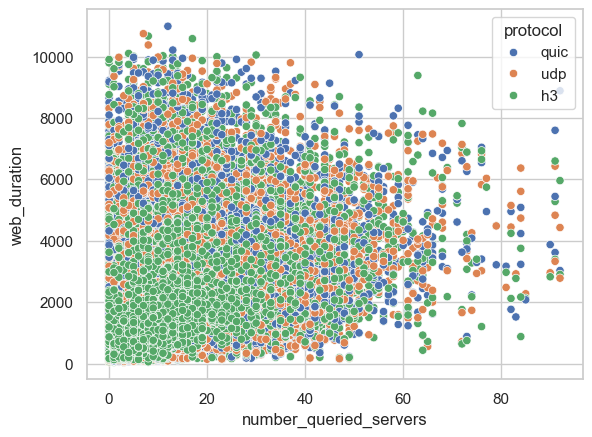

In [114]:
sns.scatterplot(data=scatterplot_df, x="number_queried_servers", y="web_duration", hue="protocol")


<Axes: xlabel='number_queried_servers', ylabel='firstcontentfulpaint'>

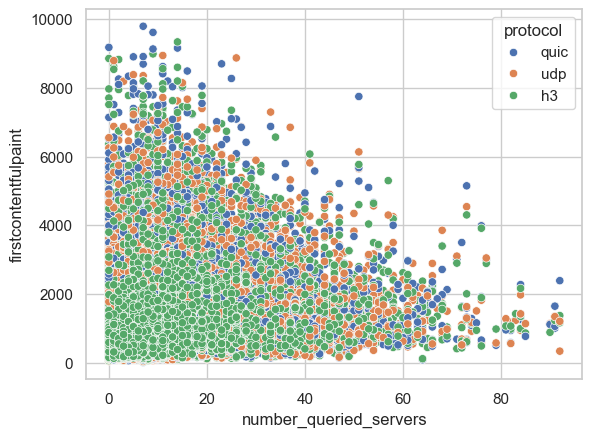

In [115]:
sns.scatterplot(data=scatterplot_df, x="number_queried_servers", y="firstcontentfulpaint", hue="protocol")


In [37]:
q_h_scatterplot_merge_df

,domain,web_duration,firstcontentfulpaint,performance_penalty_web_duration,performance_penalty_firstcontentfulpaint,_id,has_website,has_error,dns,number_dns_queries,number_objects_loaded,number_queried_servers,number_non_origin_servers,number_mime_types,bytes_downladed,har_file
0,ziosting.io,1041,811,194,76,689831,True,True,ziosting.io,None,31.0,13.0,12.0,15.0,2073468.0,True
1,windows.com,2317,3220,-84,1163,128,True,True,windows.com,None,59.0,15.0,14.0,15.0,6840387.0,True
2,nmbe.ch,468,581,-189,-157,230574,True,True,nmbe.ch,None,22.0,1.0,0.0,8.0,895822.0,True
3,citizenscience.gov,1866,1072,161,-298,595144,True,True,citizenscience.gov,None,65.0,10.0,9.0,17.0,8524448.0,True
4,citizenscience.gov,1713,1108,8,-262,595144,True,True,citizenscience.gov,None,65.0,10.0,9.0,17.0,8524448.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92559,trail4runner.com,2821,2175,28,292,476092,True,True,trail4runner.com,None,130.0,13.0,11.0,12.0,32016739.0,True
92560,vente-unique.ch,914,554,-195,-82,479914,True,True,vente-unique.ch,None,48.0,11.0,8.0,14.0,982707.0,True
92561,dalmiabharat.com,133,1266,-11,-17,479915,True,True,dalmiabharat.com,None,10.0,6.0,5.0,5.0,227209.0,True
92562,nbc5.com,1422,614,-682,-199,476100,True,True,nbc5.com,None,158.0,49.0,48.0,31.0,4428980.0,True


<Axes: xlabel='number_queried_servers', ylabel='performance_penalty_web_duration'>

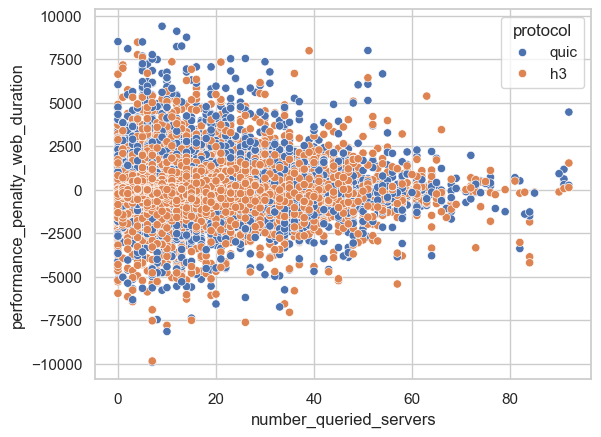

In [20]:
sns.scatterplot(data=q_h_scatterplot_merge_df, x="number_queried_servers", y="performance_penalty_web_duration", hue="protocol")


<Axes: xlabel='number_queried_servers', ylabel='performance_penalty_firstcontentfulpaint'>

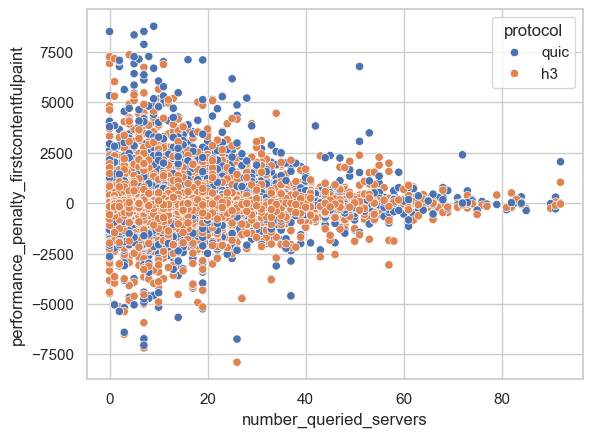

In [117]:
sns.scatterplot(data=q_h_scatterplot_merge_df, x="number_queried_servers", y="performance_penalty_firstcontentfulpaint", hue="protocol")

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_91005/1761486920.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


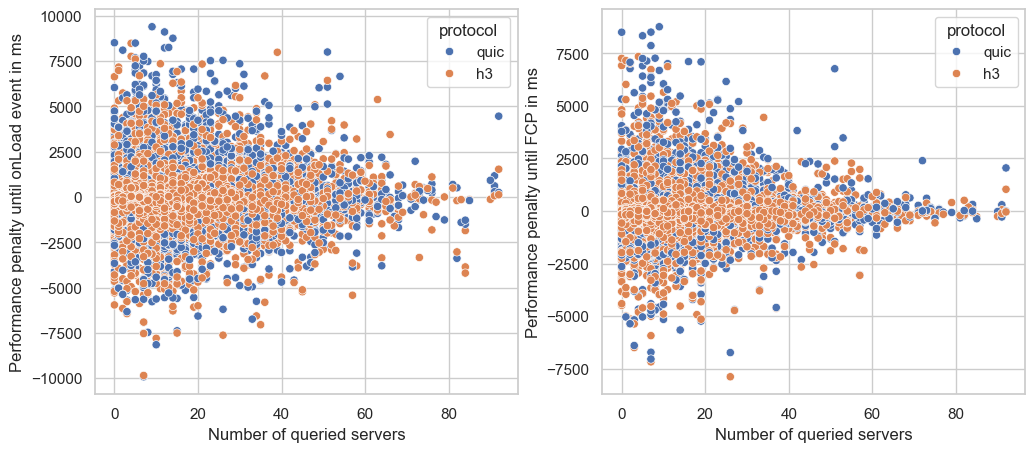

In [21]:
q_h_scatterplot_merge_df = q_h_scatterplot_merge_df.rename(columns={'number_queried_servers': 'Number of queried servers', 'performance_penalty_web_duration': 'Performance penalty until onLoad event in ms', 'performance_penalty_firstcontentfulpaint': 'Performance penalty until FCP in ms'})

fig, ax =plt.subplots(1,2)
fig.set_size_inches(12, 5)

sub_fig_3 = sns.scatterplot(data=q_h_scatterplot_merge_df, x="Number of queried servers", y="Performance penalty until onLoad event in ms", hue="protocol", ax=ax[0])
sub_fig_4 = sns.scatterplot(data=q_h_scatterplot_merge_df, x="Number of queried servers", y="Performance penalty until FCP in ms", hue="protocol", ax=ax[1])
fig.show()


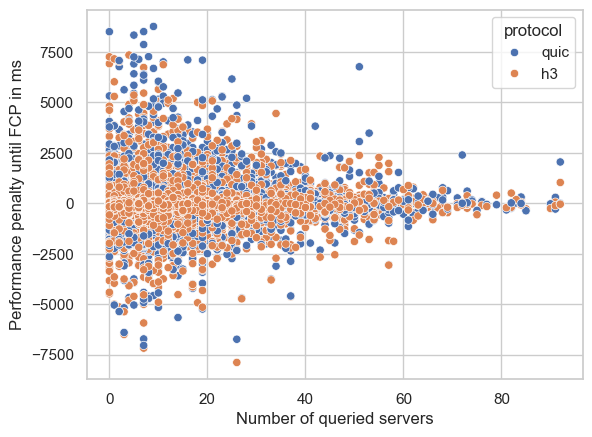

In [22]:
sns.scatterplot(data=q_h_scatterplot_merge_df, x="Number of queried servers", y="Performance penalty until FCP in ms", hue="protocol")
plt.savefig("dns_relation_loading_time.png",  bbox_inches='tight', dpi=400)


In [71]:
#TODO dauert zu lange und frisst zu viel speicher
# set loading time and performance penalty in relation to the number of DNS requests
scatterplot_df = warmed_up_intersect_measurements_df[['domain','web_duration', 'protocol', 'firstcontentfulpaint']]
scatterplot_df = pd.merge(scatterplot_df, websites_df, how='inner', right_on='dns', left_on='domain')

scatterplot_df['performance_penalty_web_duration'] = scatterplot_df['web_duration'] 
scatterplot_df['performance_penalty_firstcontentfulpaint'] = scatterplot_df['firstcontentfulpaint']

#for index, row in scatterplot_df.iterrows():
 #   row['performance_penalty_web_duration'] = row['performance_penalty_web_duration'] - warmed_up_intersect_measurements_df.loc[warmed_up_intersect_measurements_df['protocol']=='udp']['web_duration'] 
  #  row['performance_penalty_firstcontentfulpaint'] = row['performance_penalty_firstcontentfulpaint'] - warmed_up_intersect_measurements_df.loc[warmed_up_intersect_measurements_df['protocol']=='udp']['firstcontentfulpaint']


# create another column to calculate the performance penalty for each website individually
#domains_counted = warmed_up_measurements_df.groupby('domain', as_index=False)['domain'].agg({'count':'count'})
#intersect_domains = domains_counted[domains_counted['count'] == 3]

#scatterplot_df['performance_penalty_web_duration'] = 0
#scatterplot_df['performance_penalty_firstcontentfulpaint'] = 0 

sns.scatterplot(data=scatterplot_df, x="number_queried_servers", y="web_duration", hue="protocol")
sns.scatterplot(data=scatterplot_df, x="number_queried_servers", y="firstcontentfulpaint", hue="protocol")
sns.scatterplot(data=scatterplot_df, x="number_queried_servers", y="performance_penalty_web_duration", hue="protocol")
sns.scatterplot(data=scatterplot_df, x="number_queried_servers", y="performance_penalty_firstcontentfulpaint", hue="protocol")

KeyboardInterrupt: 

In [68]:
scatterplot_df['performance_penalty_web_duration'] = scatterplot_df['web_duration'] 
scatterplot_df['performance_penalty_firstcontentfulpaint'] = scatterplot_df['firstcontentfulpaint']

for index, row in scatterplot_df.iterrows():
    row['performance_penalty_web_duration'] = row['performance_penalty_web_duration'] - warmed_up_intersect_measurements_df.loc[warmed_up_intersect_measurements_df['protocol']=='udp']['web_duration'] 
    row['performance_penalty_firstcontentfulpaint'] = row['performance_penalty_firstcontentfulpaint'] - warmed_up_intersect_measurements_df.loc[warmed_up_intersect_measurements_df['protocol']=='udp']['firstcontentfulpaint']


KeyError: 'firstcontentfulpaint'

In [67]:
scatterplot_df

,domain,web_duration,protocol,_id,has_website,has_error,dns,number_dns_queries,number_objects_loaded,number_queried_servers,number_non_origin_servers,number_mime_types,bytes_downladed,har_file
0,ziosting.io,1041,quic,689831,True,True,ziosting.io,None,31.0,13.0,12.0,15.0,2073468.0,True
1,windows.com,2317,quic,128,True,True,windows.com,None,59.0,15.0,14.0,15.0,6840387.0,True
2,nmbe.ch,468,quic,230574,True,True,nmbe.ch,None,22.0,1.0,0.0,8.0,895822.0,True
3,citizenscience.gov,1866,quic,595144,True,True,citizenscience.gov,None,65.0,10.0,9.0,17.0,8524448.0,True
4,citizenscience.gov,1705,udp,595144,True,True,citizenscience.gov,None,65.0,10.0,9.0,17.0,8524448.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139312,bigbox.com.ar,3121,h3,481993,True,True,bigbox.com.ar,None,213.0,39.0,35.0,27.0,38284965.0,True
139313,airtelwork.com,1792,h3,481995,True,True,airtelwork.com,None,3.0,2.0,1.0,3.0,1142.0,True
139314,montazer.ir,1490,h3,481996,True,True,montazer.ir,None,153.0,9.0,7.0,14.0,2510746.0,True
139315,joscha.com,363,h3,481998,True,True,joscha.com,None,40.0,4.0,2.0,10.0,1023564.0,True


In [ ]:


id, dns = res.fetchone()

In [3]:
# import data 
db_udp = sqlite3.connect('web-performance.db')
db_quic = sqlite3.connect('web-performance2.db')
db_h3 = sqlite3.connect('web-performance3.db')

websites_df = pd.read_sql_query("SELECT * FROM websites", db_udp)

udp_measures_df = pd.read_sql_query("SELECT * FROM measurements", db_udp)
quic_measures_df = pd.read_sql_query("SELECT * FROM measurements", db_quic)
h3_measures_df = pd.read_sql_query("SELECT * FROM measurements", db_h3)



In [30]:
websites_df

,_id,dns,number_dns_queries,number_objects_loaded,number_queried_servers,number_non_origin_servers,number_mime_types,bytes_downladed,alexa_category
0,1,google.com,None,29.0,5.0,3.0,11.0,796855.0,None
1,2,a-msedge.net,None,NaN,NaN,NaN,NaN,NaN,None
2,3,microsoft.com,None,81.0,13.0,7.0,18.0,1042462.0,None
3,4,amazonaws.com,None,NaN,NaN,NaN,NaN,NaN,None
4,5,facebook.com,None,67.0,4.0,2.0,8.0,1207192.0,None
...,...,...,...,...,...,...,...,...,...
4632990,4632991,ip-kamery.net,None,NaN,NaN,NaN,NaN,NaN,None
4632991,4632992,nneformat.ru,None,NaN,NaN,NaN,NaN,NaN,None
4632992,4632993,svreumatologia.es,None,NaN,NaN,NaN,NaN,NaN,None
4632993,4632994,reggiomotori.it,None,NaN,NaN,NaN,NaN,NaN,None


In [31]:
quic_measures_df

,id,protocol,server,domain,timestamp,connectEnd,connectStart,domComplete,domContentLoadedEventEnd,domContentLoadedEventStart,...,secureConnectionStart,startTime,firstPaint,firstContentfulPaint,nextHopProtocol,cacheWarming,error,redirectStart,redirectEnd,redirectCount
0,None,quic,dns.adguard-dns.com,google.com,1724160479,2418.0,1743.0,4838.0,3784.0,3781.0,...,1743.0,0,0,3108.0,h3,1,,0,0,0
1,None,quic,dns.adguard-dns.com,google.com,1724160490,1276.0,1115.0,3106.0,2069.0,2061.0,...,1115.0,0,0,1610.0,h3,0,,0,0,0
2,None,quic,dns.adguard-dns.com,a-msedge.net,1724160499,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,1,Message: Reached error page: about:neterror?e=...,0,0,0
3,None,quic,dns.adguard-dns.com,microsoft.com,1724160506,1174.0,1174.0,4980.0,3468.0,3460.0,...,1174.0,0,0,2594.0,h2,1,,0,0,0
4,None,quic,dns.adguard-dns.com,microsoft.com,1724160516,1486.0,1486.0,6459.0,5108.0,5100.0,...,1486.0,0,0,4309.0,h2,0,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,None,quic,dns.adguard-dns.com,interia.pl,1724177240,658.0,658.0,2288.0,1498.0,1491.0,...,658.0,0,0,1483.0,h2,0,,0,0,0
1710,None,quic,dns.adguard-dns.com,mobile.de,1724177247,0.0,0.0,2641.0,1271.0,1269.0,...,0.0,0,0,1170.0,h2,1,,0,0,0
1711,None,quic,dns.adguard-dns.com,mobile.de,1724177256,0.0,0.0,2756.0,1479.0,1478.0,...,0.0,0,0,1327.0,h2,0,,0,0,0
1712,None,quic,dns.adguard-dns.com,ecosia.org,1724177265,1022.0,944.0,2098.0,1467.0,1462.0,...,975.0,0,0,1499.0,h2,1,,0,0,0


In [4]:
# filter all cache warming queries out

actual_udp_measures_df = udp_measures_df.loc[udp_measures_df['cacheWarming'] == 0]
actual_quic_measures_df = quic_measures_df.loc[quic_measures_df['cacheWarming'] == 0]
actual_h3_measures_df = h3_measures_df.loc[h3_measures_df['cacheWarming'] == 0]

In [7]:
# calculating delta times
pd.options.mode.chained_assignment = None # disabling warning because I don't care about efficiency here

# connectEnd -connectStart
actual_udp_measures_df['connectDuration'] = actual_udp_measures_df['connectEnd'] - actual_udp_measures_df['connectStart']
actual_quic_measures_df['connectDuration'] = actual_quic_measures_df['connectEnd'] - actual_quic_measures_df['connectStart']
actual_h3_measures_df['connectDuration'] = actual_h3_measures_df['connectEnd'] - actual_h3_measures_df['connectStart']

# domComplete - connectStart
actual_udp_measures_df['domCompleteDuration'] = actual_udp_measures_df['domComplete'] - actual_udp_measures_df['domainLookupStart']
actual_quic_measures_df['domCompleteDuration'] = actual_quic_measures_df['domComplete'] - actual_quic_measures_df['domainLookupStart']
actual_h3_measures_df['domCompleteDuration'] = actual_h3_measures_df['domComplete'] - actual_h3_measures_df['domainLookupStart']

# domainLookupEnd - domainLookupStart
actual_udp_measures_df['domainLookupDuration'] = actual_udp_measures_df['domainLookupEnd'] - actual_udp_measures_df['domainLookupStart']
actual_quic_measures_df['domainLookupDuration'] = actual_quic_measures_df['domainLookupEnd'] - actual_quic_measures_df['domainLookupStart']
actual_h3_measures_df['domainLookupDuration'] = actual_h3_measures_df['domainLookupEnd'] - actual_h3_measures_df['domainLookupStart']


# firstPaint - connectStart
actual_udp_measures_df['firstPaintDuration'] = actual_udp_measures_df['firstPaint'] - actual_udp_measures_df['domainLookupStart']
actual_quic_measures_df['firstPaintDuration'] = actual_quic_measures_df['firstPaint'] - actual_quic_measures_df['domainLookupStart']
actual_h3_measures_df['firstPaintDuration'] = actual_h3_measures_df['firstPaint'] - actual_h3_measures_df['domainLookupStart']


# firstContentfulPaint - connectStart
actual_udp_measures_df['firstContentfulPaintDuration'] = actual_udp_measures_df['firstContentfulPaint'] - actual_udp_measures_df['domainLookupStart']
actual_quic_measures_df['firstContentfulPaintDuration'] = actual_quic_measures_df['firstContentfulPaint'] - actual_quic_measures_df['domainLookupStart']
actual_h3_measures_df['firstContentfulPaintDuration'] = actual_h3_measures_df['firstContentfulPaint'] - actual_h3_measures_df['domainLookupStart']

# secureConnectionStart - connectStart
actual_udp_measures_df['secureConnectionDuration'] = actual_udp_measures_df['secureConnectionStart'] - actual_udp_measures_df['domainLookupStart']
actual_quic_measures_df['secureConnectionDuration'] = actual_quic_measures_df['secureConnectionStart'] - actual_quic_measures_df['domainLookupStart']
actual_h3_measures_df['secureConnectionDuration'] = actual_h3_measures_df['secureConnectionStart'] - actual_h3_measures_df['domainLookupStart']

# loadEventEnd - loadEventStart
actual_udp_measures_df['loadEventDuration'] = actual_udp_measures_df['loadEventEnd'] - actual_udp_measures_df['loadEventStart']
actual_quic_measures_df['loadEventDuration'] = actual_quic_measures_df['loadEventEnd'] - actual_quic_measures_df['loadEventStart']
actual_h3_measures_df['loadEventDuration'] = actual_h3_measures_df['loadEventEnd'] - actual_h3_measures_df['loadEventStart']

# domInteractive - connectStart
actual_udp_measures_df['domInteractiveDuration'] = actual_udp_measures_df['domInteractive'] - actual_udp_measures_df['domainLookupStart']
actual_quic_measures_df['domInteractiveDuration'] = actual_quic_measures_df['domInteractive'] - actual_quic_measures_df['domainLookupStart']
actual_h3_measures_df['domInteractiveDuration'] = actual_h3_measures_df['domInteractive'] - actual_h3_measures_df['domainLookupStart']

# domContentLoadedEventEnd - domContentLoadedEventStart
actual_udp_measures_df['domContentLoadedEventDuration'] = actual_udp_measures_df['domContentLoadedEventEnd'] - actual_udp_measures_df['domContentLoadedEventStart']
actual_quic_measures_df['domContentLoadedEventDuration'] = actual_quic_measures_df['domContentLoadedEventEnd'] - actual_quic_measures_df['domContentLoadedEventStart']
actual_h3_measures_df['domContentLoadedEventDuration'] = actual_h3_measures_df['domContentLoadedEventEnd'] - actual_h3_measures_df['domContentLoadedEventStart']


In [8]:
# mergge dataframes 
frames = [actual_udp_measures_df, actual_quic_measures_df, actual_h3_measures_df]
data_df = pd.concat(frames)

In [6]:
actual_udp_measures_df['domainLookupStart']

1       489.0
4       938.0
7       567.0
9        52.0
11      251.0
        ...  
1703    827.0
1705    373.0
1707    652.0
1709      0.0
1711    547.0
Name: domainLookupStart, Length: 712, dtype: float64

<AxesSubplot:xlabel='protocol', ylabel='connectDuration'>

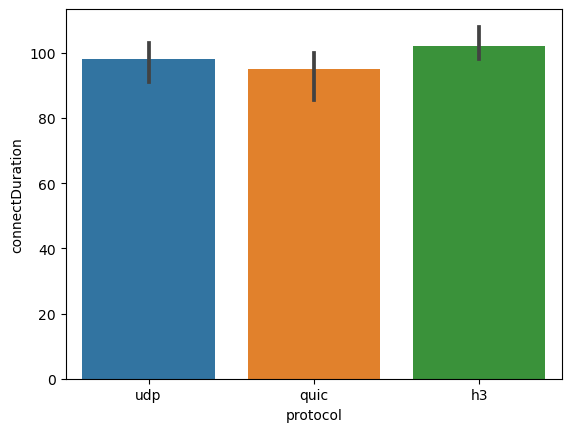

In [9]:
# bar diagram showing median and mean for all columns above hue=protocol
sns.barplot(data=data_df, x="protocol", y="connectDuration", estimator=np.median)

<AxesSubplot:xlabel='protocol', ylabel='domCompleteDuration'>

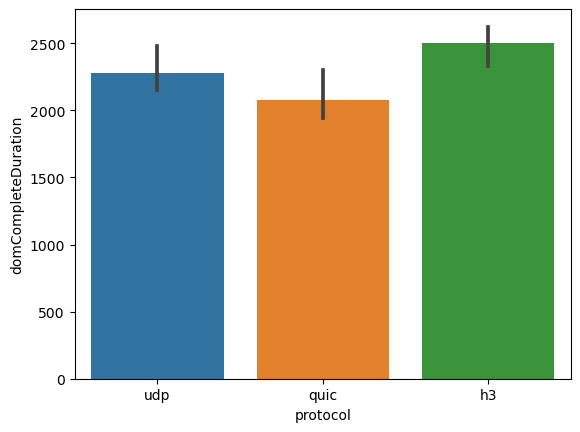

In [10]:
sns.barplot(data=data_df, x="protocol", y="domCompleteDuration", estimator=np.median)

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_65756/1126607500.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


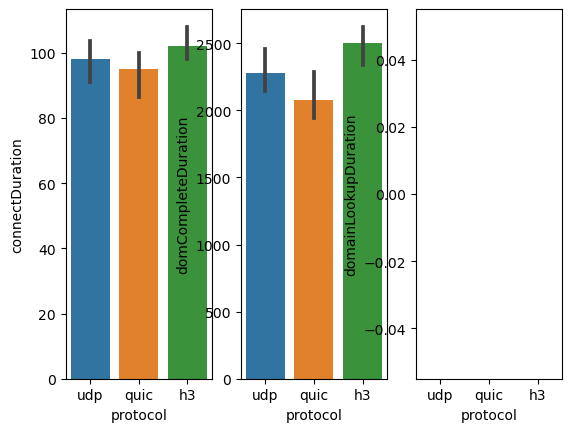

In [11]:
fig, ax =plt.subplots(1,3)
sns.barplot(data=data_df, x="protocol", y="connectDuration", estimator=np.median, ax=ax[0])
sns.barplot(data=data_df, x="protocol", y="domCompleteDuration", estimator=np.median, ax=ax[1])
sns.barplot(data=data_df, x="protocol", y="domainLookupDuration", estimator=np.median, ax=ax[2])
fig.show()


/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_65756/658024462.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


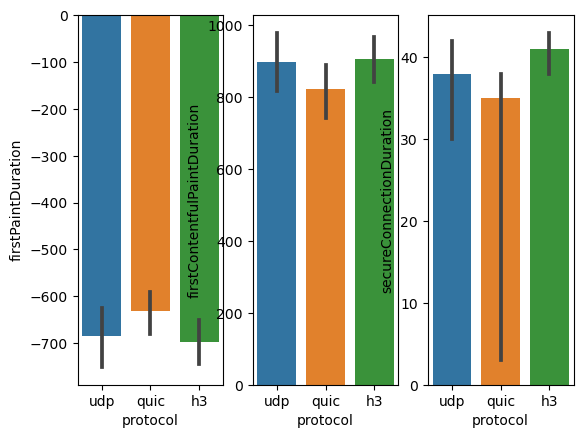

In [12]:
fig, ax =plt.subplots(1,3)
sns.barplot(data=data_df, x="protocol", y="firstPaintDuration", estimator=np.median, ax=ax[0])
sns.barplot(data=data_df, x="protocol", y="firstContentfulPaintDuration", estimator=np.median, ax=ax[1])
sns.barplot(data=data_df, x="protocol", y="secureConnectionDuration", estimator=np.median, ax=ax[2])
fig.show()

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_65756/2953372820.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


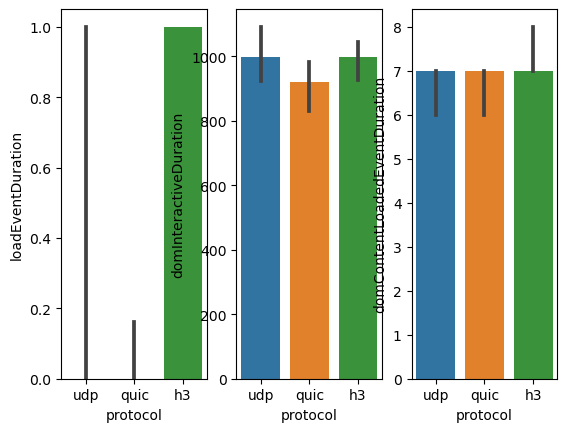

In [13]:
fig, ax =plt.subplots(1,3)
sns.barplot(data=data_df, x="protocol", y="loadEventDuration", estimator=np.median, ax=ax[0])
sns.barplot(data=data_df, x="protocol", y="domInteractiveDuration", estimator=np.median, ax=ax[1])
sns.barplot(data=data_df, x="protocol", y="domContentLoadedEventDuration", estimator=np.median, ax=ax[2])
fig.show()

In [ ]:
# categorization of websites 
# e.g. loading time of websites with 
    #many DNS requests, 
    #many objects, 
    #many bytes transferred, 
    #number of queried server, 
    #number of non-origin servers
    #mime types

In [ ]:
# TODO data missing: RTT (already in logs, but not in db), number of DNS requests made (should be number of queried servers?)
# see diagrams folder

In [49]:
data_merged_df = data_df.merge(websites_df, left_on='domain', right_on='dns')

In [50]:
data_merged_df

,id,protocol,server,domain,timestamp,connectEnd,connectStart,domComplete,domContentLoadedEventEnd,domContentLoadedEventStart,...,domContentLoadedEventDuration,_id,dns,number_dns_queries,number_objects_loaded,number_queried_servers,number_non_origin_servers,number_mime_types,bytes_downladed,alexa_category
0,None,udp,94.140.14.14(adguard),google.com,1724160024,605.0,490.0,2307.0,1409.0,1405.0,...,4.0,1,google.com,None,29.0,5.0,3.0,11.0,796855.0,None
1,None,quic,dns.adguard-dns.com,google.com,1724160490,1276.0,1115.0,3106.0,2069.0,2061.0,...,8.0,1,google.com,None,29.0,5.0,3.0,11.0,796855.0,None
2,None,h3,dns.google.com,google.com,1724160498,1189.0,1073.0,3020.0,1834.0,1828.0,...,6.0,1,google.com,None,29.0,5.0,3.0,11.0,796855.0,None
3,None,udp,94.140.14.14(adguard),microsoft.com,1724160044,938.0,938.0,2725.0,1706.0,1699.0,...,7.0,3,microsoft.com,None,81.0,13.0,7.0,18.0,1042462.0,None
4,None,quic,dns.adguard-dns.com,microsoft.com,1724160516,1486.0,1486.0,6459.0,5108.0,5100.0,...,8.0,3,microsoft.com,None,81.0,13.0,7.0,18.0,1042462.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,None,h3,dns.google.com,infonline.de,1724176356,0.0,0.0,0.0,0.0,0.0,...,0.0,932,infonline.de,None,91.0,13.0,11.0,14.0,3095018.0,None
2055,None,h3,dns.google.com,cisco.com,1724163649,1750.0,1587.0,4128.0,2605.0,2593.0,...,12.0,202,cisco.com,None,55.0,4.0,3.0,17.0,1074543.0,None
2056,None,h3,dns.google.com,taobao.com,1724163794,3878.0,3766.0,9750.0,5063.0,5055.0,...,8.0,209,taobao.com,None,117.0,24.0,18.0,17.0,1179576.0,None
2057,None,h3,dns.google.com,ring.com,1724164027,0.0,0.0,0.0,0.0,0.0,...,0.0,224,ring.com,None,143.0,16.0,11.0,24.0,9538034.0,None


<AxesSubplot:xlabel='number_objects_loaded', ylabel='connectDuration'>

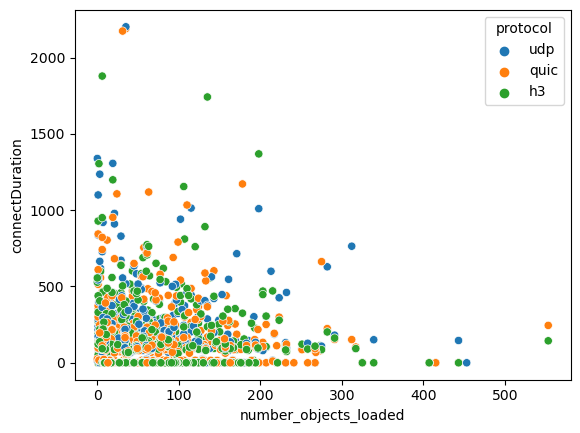

In [52]:
# time needed for connection hue= protocol, x=connectDuration
sns.scatterplot(data=data_merged_df, x="number_objects_loaded", y="connectDuration", hue="protocol")

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_36336/681518981.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


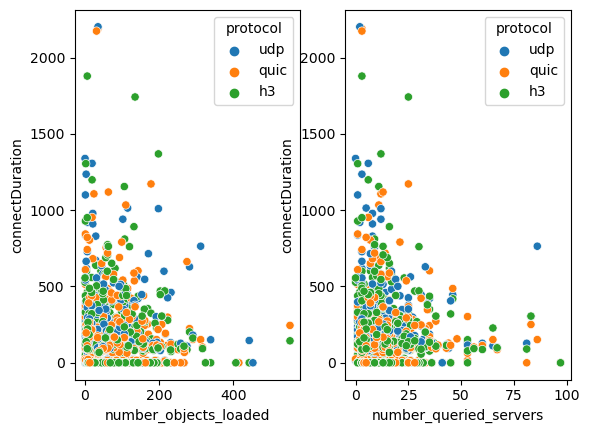

In [53]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data=data_merged_df, x="number_objects_loaded", y="connectDuration", hue="protocol", ax=ax[0])
sns.scatterplot(data=data_merged_df, x="number_queried_servers", y="connectDuration", hue="protocol", ax=ax[1])
fig.show()

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_36336/3775328663.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


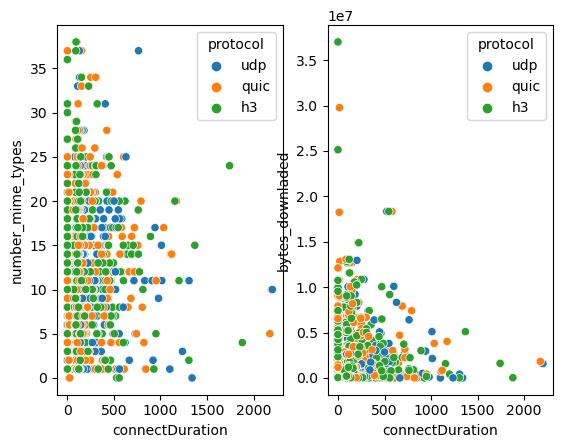

In [55]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data=data_merged_df, x="connectDuration", y="number_mime_types", hue="protocol", ax=ax[0])
sns.scatterplot(data=data_merged_df, x="connectDuration", y="bytes_downladed", hue="protocol", ax=ax[1])
fig.show()

In [ ]:
db_udp.close()
db_quic.close()
db_h3.close()


In [22]:
# import data 
db = sqlite3.connect('web-performance.db')
cursor = db.cursor()
cursor.execute("DELETE FROM measurements")
db.commit()
db.close()